In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Data Read

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Kaggle/Titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Kaggle/Titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Filtering

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.duplicated().sum()

0

In [ ]:
survived_Older_female = train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 'female')  & (train_data['Age'] > 50)]
survived_Older_female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S


In [ ]:
survived_Older_male = train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 'male')  & (train_data['Age'] > 50)]
survived_Older_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.50,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.00,A23,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.50,A26,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S


### Data Viz

Text(0.5, 1.0, 'visualizing null values')

<Figure size 1000x600 with 0 Axes>

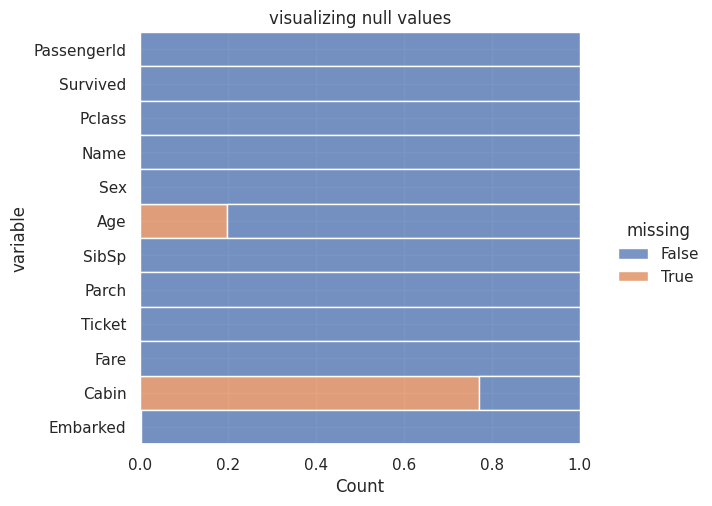

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=train_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("visualizing null values")

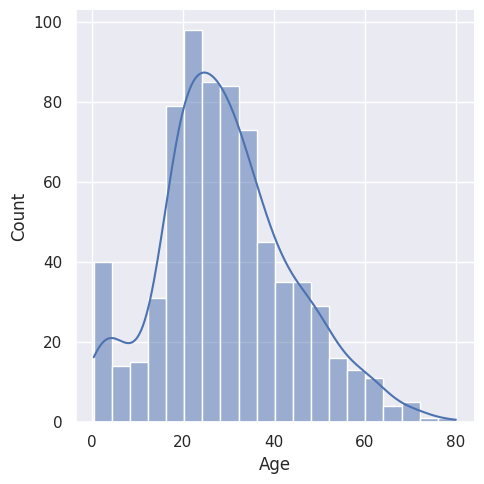

In [ ]:
sns.displot(train_data['Age'], kde= True)

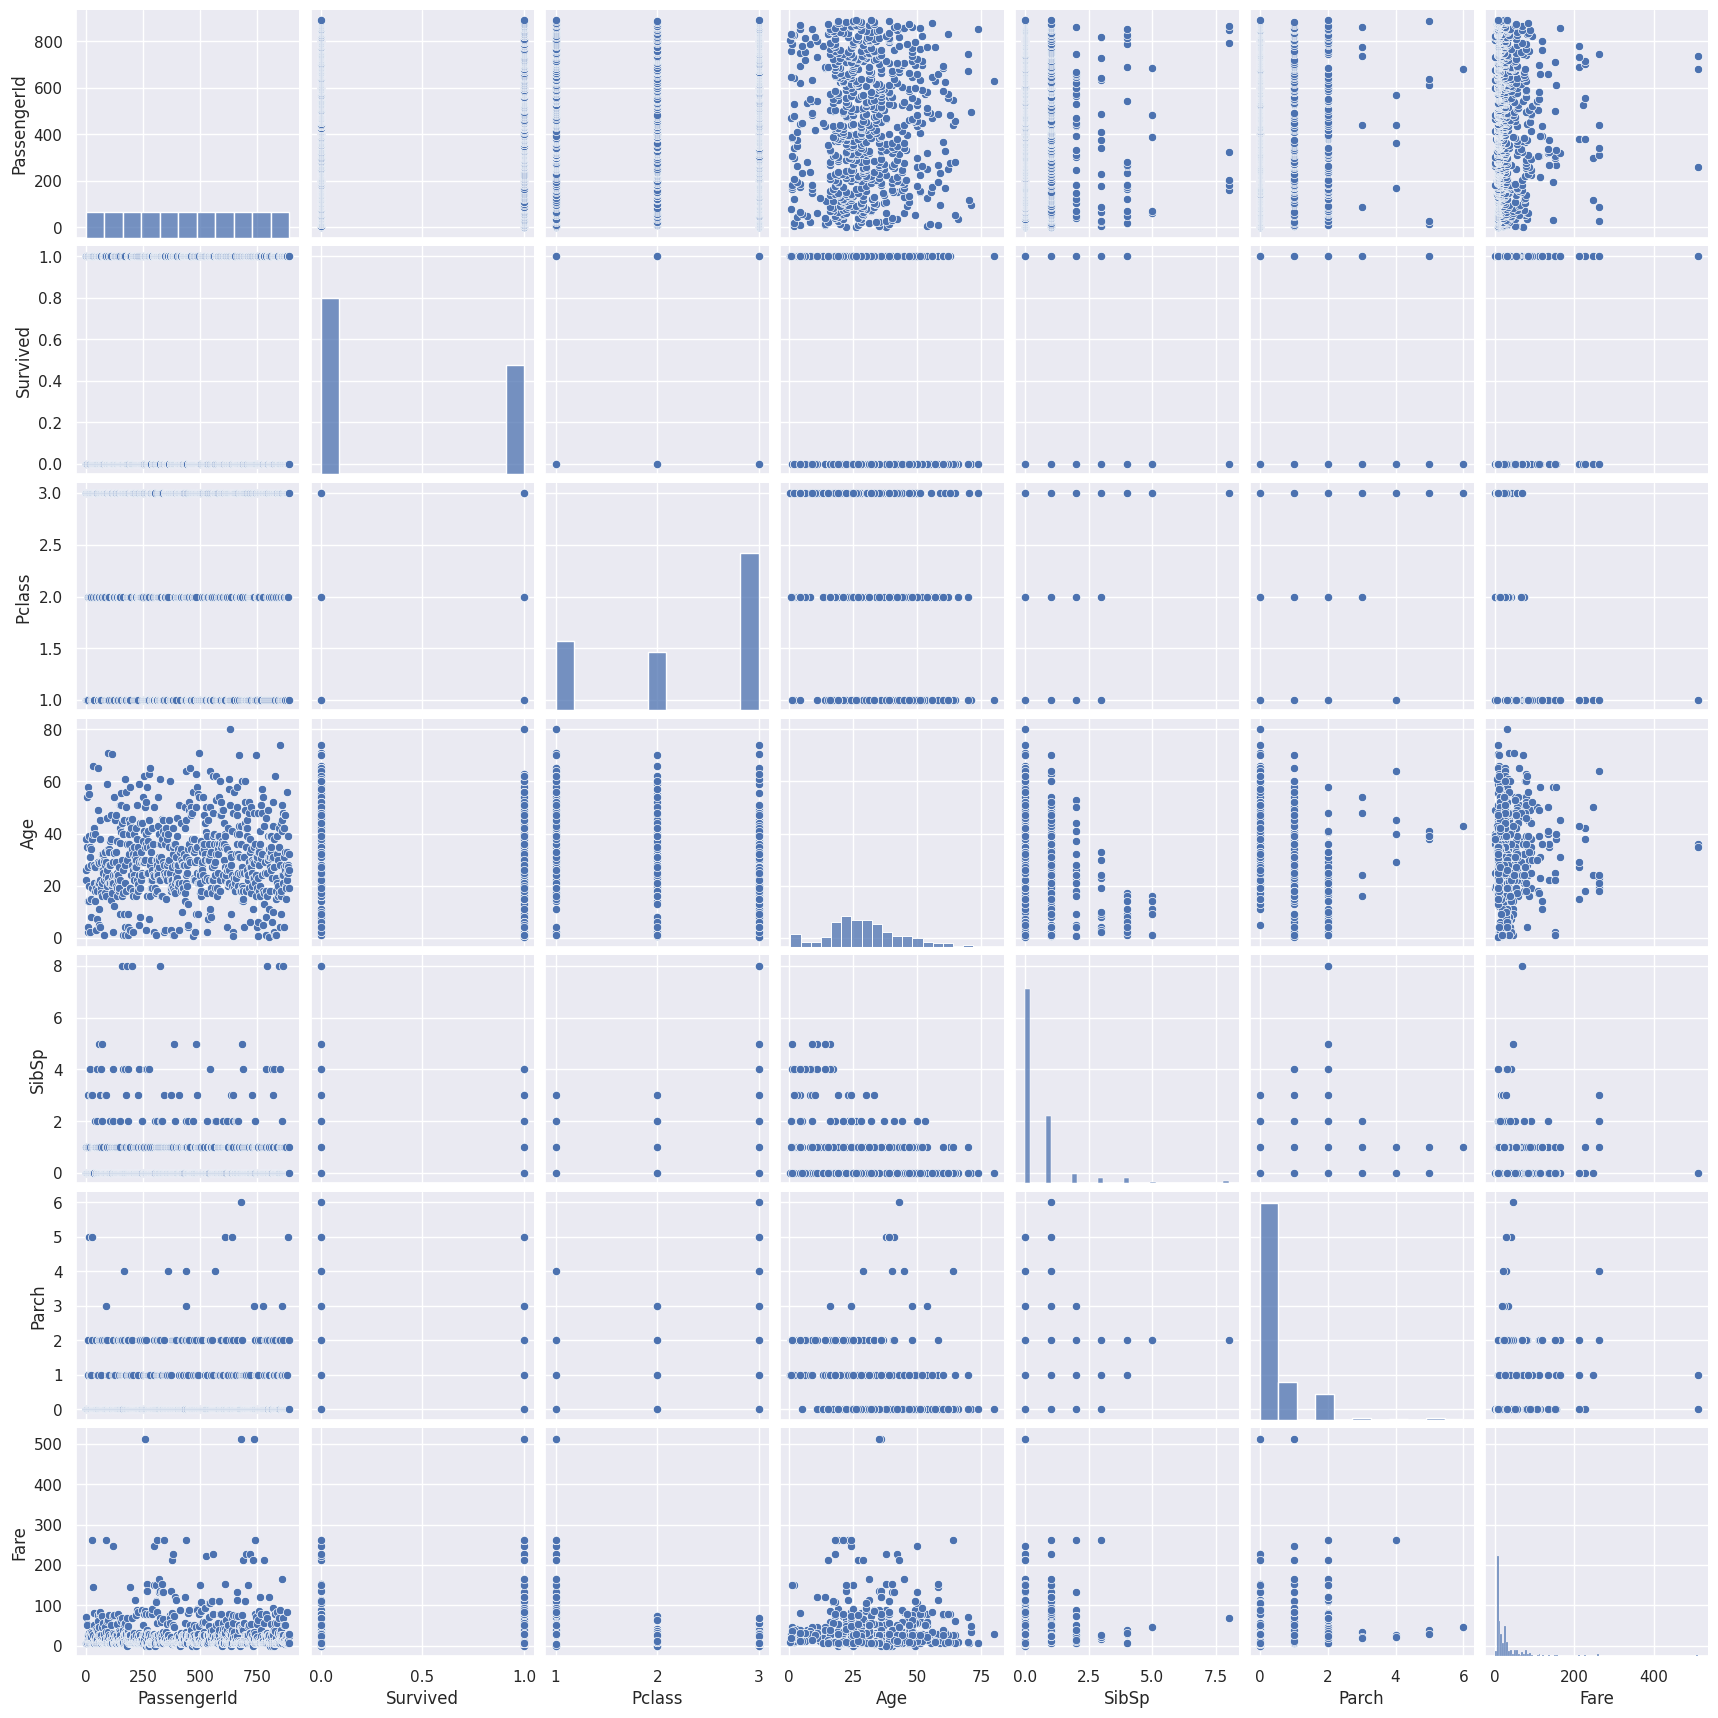

In [ ]:
sns.pairplot(data = train_data)
plt.show()

In [ ]:
def histogram(data, column):
    print(f'### {column} ###')
    print(data[column].value_counts(normalize=True))
    fig = px.histogram(data, x = column, color = column)
    fig.update_layout(bargap=0.2)
    fig.show()

In [ ]:
histogram(train_data, 'Pclass')

### Pclass ###
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


In [ ]:
histogram(train_data, 'Sex')

### Sex ###
male      0.647587
female    0.352413
Name: Sex, dtype: float64


### Cleaning and Preprocessing

In [ ]:
data = pd.concat([train_data, test_data], axis = 0)
data = data.reset_index()
data

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mode()[0])

In [ ]:
data.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [32]:
# create a new feature indicating if the passenger had a cabin or not
data['has_cabin'] = train_data['Cabin'].notnull().astype(int)
data['has_cabin'] = data.groupby(['Fare'])['has_cabin'].apply(lambda x: x.fillna(x.median()))
data

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,0.0
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1.0
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,0.0


In [33]:
data.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'has_cabin'],
      dtype='object')

In [34]:
final = pd.DataFrame(columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'has_cabin'], data=data)
final

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,has_cabin
0,0.0,3,male,22.0,1,0,S,0.0
1,1.0,1,female,38.0,1,0,C,1.0
2,1.0,3,female,26.0,0,0,S,0.0
3,1.0,1,female,35.0,1,0,S,1.0
4,0.0,3,male,35.0,0,0,S,0.0
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,25.0,0,0,S,0.0
1305,NaN,1,female,39.0,0,0,C,1.0
1306,NaN,3,male,38.5,0,0,S,0.0
1307,NaN,3,male,25.0,0,0,S,0.0


In [35]:
X = final.drop(['Survived'], axis = 1)
y = final.filter(['Survived'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Sex        1309 non-null   object 
 2   Age        1309 non-null   float64
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Embarked   1309 non-null   object 
 6   has_cabin  1264 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [36]:
numerical = X.drop(['Sex', 'Embarked'], axis = 1)
numerical.head()

,Pclass,Age,SibSp,Parch,has_cabin
0,3,22.0,1,0,0.0
1,1,38.0,1,0,1.0
2,3,26.0,0,0,0.0
3,1,35.0,1,0,1.0
4,3,35.0,0,0,0.0


In [37]:
categorical = X.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'has_cabin'], axis = 1)
categorical.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [38]:
# One Hot Encoding
cat_to_numerical = pd.get_dummies(categorical, drop_first=True)
cat_to_numerical.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [39]:
# All features
X = pd.concat([numerical, cat_to_numerical], axis = 1)
X

,Pclass,Age,SibSp,Parch,has_cabin,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0.0,1,0,1
1,1,38.0,1,0,1.0,0,0,0
2,3,26.0,0,0,0.0,0,0,1
3,1,35.0,1,0,1.0,0,0,1
4,3,35.0,0,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...
1304,3,25.0,0,0,0.0,1,0,1
1305,1,39.0,0,0,1.0,0,0,0
1306,3,38.5,0,0,0.0,1,0,1
1307,3,25.0,0,0,0.0,1,0,1


In [40]:
test = X.tail(418)
X = X.head(891)
y = y.head(891)

test['has_cabin'].unique()

array([0. , nan, 1. , 0.5])

In [41]:
# Converting nan to 0 and 0.5  to 1
test['has_cabin'] = test['has_cabin'].replace([0, np.nan], 0).replace([1, 0.5], 1)
test['has_cabin'].unique()

array([0., 1.])

In [42]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [43]:
test

,Pclass,Age,SibSp,Parch,has_cabin,Sex_male,Embarked_Q,Embarked_S
891,3,34.5,0,0,0.0,1,1,0
892,3,47.0,1,0,0.0,0,0,1
893,2,62.0,0,0,0.0,1,1,0
894,3,27.0,0,0,0.0,1,0,1
895,3,22.0,1,1,0.0,0,0,1
...,...,...,...,...,...,...,...,...
1304,3,25.0,0,0,0.0,1,0,1
1305,1,39.0,0,0,1.0,0,0,0
1306,3,38.5,0,0,0.0,1,0,1
1307,3,25.0,0,0,0.0,1,0,1


### ML

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(801, 8) (90, 8) (801, 1) (90, 1)


In [59]:
y_test

,Survived
463,0.0
802,1.0
223,0.0
648,0.0
799,0.0
...,...
579,1.0
477,0.0
676,0.0
198,1.0


In [70]:
# Algo Train
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=22)

model = model.fit(X_train, y_train)

[Text(0.5446428571428571, 0.9, 'x[5] <= 0.5\ngini = 0.473\nsamples = 801\nvalue = [494, 307]\nclass = Survived'),
 Text(0.2857142857142857, 0.7, 'x[0] <= 2.5\ngini = 0.392\nsamples = 284\nvalue = [76, 208]\nclass = Not Survived'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 2.5\ngini = 0.113\nsamples = 150\nvalue = [9, 141]\nclass = Not Survived'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Survived'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Survived'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not Survived'),
 Text(0.21428571428571427, 0.3, 'x[0] <= 1.5\ngini = 0.102\nsamples = 148\nvalue = [8, 140]\nclass = Not Survived'),
 Text(0.17857142857142858, 0.1, 'gini = 0.048\nsamples = 81\nvalue = [2, 79]\nclass = Not Survived'),
 Text(0.25, 0.1, 'gini = 0.163\nsamples = 67\nvalue = [6, 61]\nclass = Not Survived'),
 Text(0.42857142857142855, 0.5, 'x[7] <= 0.5\ng

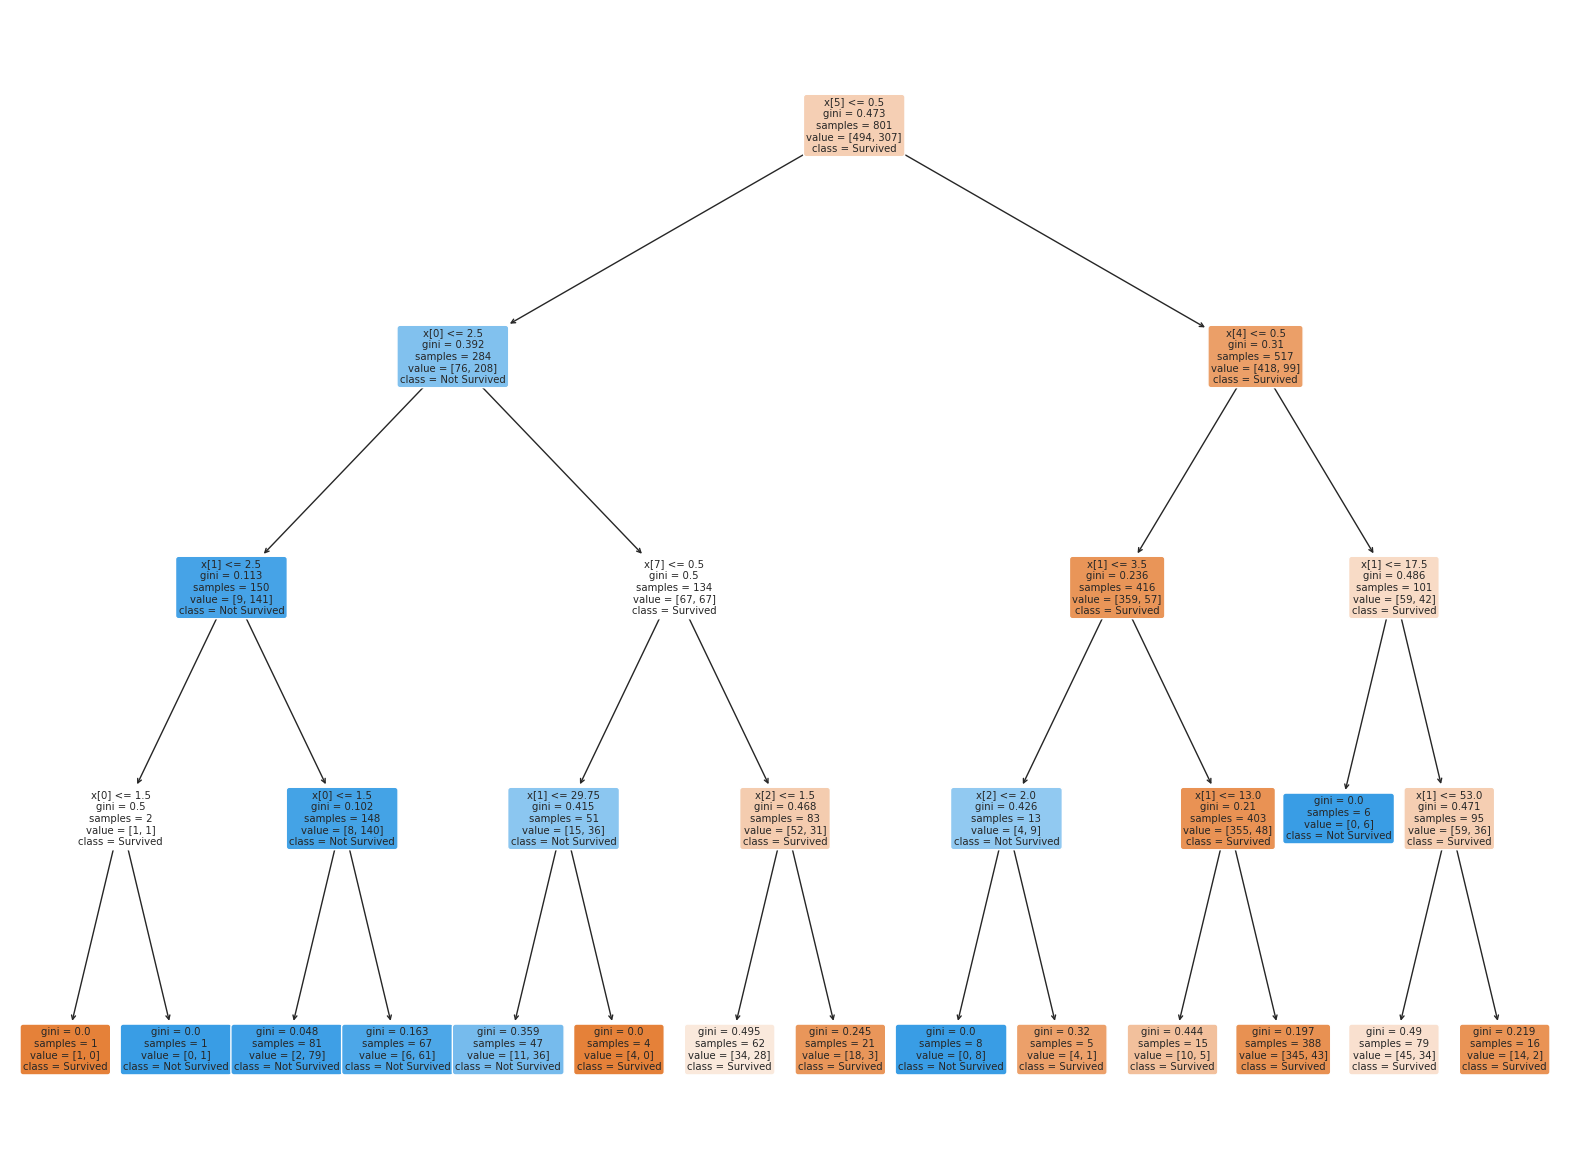

In [71]:
#Plot the tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

from sklearn import tree
tree.plot_tree(model.fit(X_train, y_train), 
               class_names = ["Survived", "Not Survived"],
               filled=True,
               rounded=True,) 

In [72]:
# Perform prediction on X_test
y_pred_proba = np.round(model.predict_proba(X_test)[:,1], 2)
y_pred = model.predict(X_test)

predictions = pd.DataFrame(y_pred_proba, columns=['probability'])
predictions['predicted_Output'] = y_pred
y_test = y_test.rename(columns={y_test.columns[0]: 'Output'})
y_test.reset_index(drop=True, inplace=True)
y_test_predictions = pd.concat([y_test, predictions], axis=1)
y_test_predictions

,Output,probability,predicted_Output
0,0.0,0.11,0.0
1,1.0,1.00,1.0
2,0.0,0.11,0.0
3,0.0,0.11,0.0
4,0.0,0.45,0.0
...,...,...,...
85,1.0,0.11,0.0
86,0.0,0.11,0.0
87,0.0,0.11,0.0
88,1.0,0.77,1.0


In [73]:
accuracy_score(y_test_predictions['Output'], y_test_predictions['predicted_Output'])

0.8666666666666667

In [74]:
print(classification_report(y_test_predictions['Output'], y_test_predictions['predicted_Output']))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90        55
         1.0       0.93      0.71      0.81        35

    accuracy                           0.87        90
   macro avg       0.88      0.84      0.85        90
weighted avg       0.87      0.87      0.86        90



In [75]:
# Perform prediction on test data
test.reset_index(drop=True, inplace=True)
y_pred_proba = np.round(model.predict_proba(test)[:,1], 2)
y_pred = model.predict(test)

predictions = pd.DataFrame(y_pred_proba, columns=['probability'])
predictions['predicted_Output'] = y_pred
display(predictions)
print(predictions['predicted_Output'].value_counts())

,probability,predicted_Output
0,0.11,0.0
1,0.45,0.0
2,0.11,0.0
3,0.11,0.0
4,0.45,0.0
...,...,...
413,0.11,0.0
414,0.98,1.0
415,0.11,0.0
416,0.11,0.0


0.0    307
1.0    111
Name: predicted_Output, dtype: int64


#### Grid Search and CV

In [76]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15],
              'max_features': ['auto'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

model = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

y_pred = np.round(grid_result.predict(X_test), 2)

#Best hyperparameters in the grid search
grid_result.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [77]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
                       
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,gini,15,0.770186,0.78125,0.78750,0.70625,0.85000,0.779037,0.045801,1
31,gini,15,0.807453,0.76250,0.78750,0.71875,0.81875,0.778991,0.035677,2
0,gini,None,0.826087,0.77500,0.76250,0.68750,0.83750,0.777717,0.053463,3
22,gini,10,0.770186,0.77500,0.76250,0.73125,0.83750,0.775287,0.034639,4
34,gini,15,0.776398,0.76875,0.76875,0.73750,0.82500,0.775280,0.028235,5
...,...,...,...,...,...,...,...,...,...,...
18,gini,10,0.776398,0.71250,0.77500,0.66250,0.79375,0.744030,0.049234,68
19,gini,10,0.745342,0.78125,0.72500,0.66875,0.78750,0.741568,0.043071,69
1,gini,None,0.782609,0.73750,0.72500,0.65000,0.81250,0.741522,0.055482,70
13,gini,5,0.751553,0.73125,0.68750,0.69375,0.83750,0.740311,0.054058,71


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [78]:
accuracy_score(y_test_predictions['Output'], y_pred)

0.8444444444444444

In [79]:
print(classification_report(y_test_predictions['Output'], y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88        55
         1.0       0.92      0.66      0.77        35

    accuracy                           0.84        90
   macro avg       0.87      0.81      0.82        90
weighted avg       0.86      0.84      0.84        90



In [80]:
# Perform prediction on test data
test.reset_index(drop=True, inplace=True)
y_pred_proba = np.round(grid_result.predict_proba(test)[:,1], 2)
y_pred = grid_result.predict(test)

predictions = pd.DataFrame(y_pred_proba, columns=['probability'])
predictions['predicted_Output'] = y_pred
display(predictions)
print(predictions['predicted_Output'].value_counts())

,probability,predicted_Output
0,0.06,0.0
1,0.00,0.0
2,0.22,0.0
3,0.75,1.0
4,0.50,0.0
...,...,...
413,0.10,0.0
414,1.00,1.0
415,0.05,0.0
416,0.10,0.0


0.0    305
1.0    113
Name: predicted_Output, dtype: int64
